# Heart Disease Classification

This notebook aims to build a ML model capable of predicting whether or not an individual has heart disease based on their medical attributes

**We're going to take this approach:**

 * 1. Problem Definition
 * 2. Data
 * 3. Evaluation
 * 4. Features
 * 5. Modelling
 * 6. Experimentation
 
## 1. Problem Definition

> Given clinical parameters about a patient, can we predict whether or not they have heart disease?

## 2. Data

> From UCI's Heart Disease Data Set, we collected it in a CSV from Kaggle.  The data dictionary is below.

## 3. Evaluation

We need to have a very accurate model.

> If we can achieve 90% accuracy then we can consider this a successful proof of concept

## 4. Features

> We have a variety of features to use here, including demographic information as well as medical statistics about each patient in the dataset
>
> **Column Descriptions:**
> * id (Unique id for each patient)
> * age (Age of the patient in years)
> * origin (place of study)
> * sex (Male/Female)
> * cp chest pain type ([typical angina, atypical angina, non-anginal, asymptomatic])
> * trestbps resting blood pressure (resting blood pressure (in mm Hg on admission to the hospital))
> * chol (serum cholesterol in mg/dl)
> * fbs (if fasting blood sugar > 120 mg/dl)
> * restecg (resting electrocardiographic results) -- Values: [normal, stt abnormality, lv hypertrophy]
> * thalach: maximum heart rate achieved
> * exang: exercise-induced angina (True/ False)
> * oldpeak: ST depression induced by exercise relative to rest
> * slope: the slope of the peak exercise ST segment
> * ca: number of major vessels (0-3) colored by fluoroscopy
> * thal: [normal; fixed defect; reversible defect]
> * num: the predicted attribute

## 5. Modeling

### 5.1 Prepare the tools

In [1]:
import matplotlib
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
hd_df = pd.read_csv("https://raw.githubusercontent.com/mrdbourke/zero-to-mastery-ml/master/data/heart-disease.csv")
hd_df.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1

### 5.2 Data Exploration (exploratory data analysis)

Our goal is to find out more about the data and become a SME on the data we're working with

* What questions are we trying to solve?
* What kind of data do we have and how do we handle different data types?
* What's missing from the data and how do we deal with it?
* Where are the outliers and why should we care about them?
* How can we add, change, or remove features to get more out of the data?

In [3]:
hd_df.describe().transpose()

count        mean        std    min    25%    50%    75%    max
age       303.0   54.366337   9.082101   29.0   47.5   55.0   61.0   77.0
sex       303.0    0.683168   0.466011    0.0    0.0    1.0    1.0    1.0
cp        303.0    0.966997   1.032052    0.0    0.0    1.0    2.0    3.0
trestbps  303.0  131.623762  17.538143   94.0  120.0  130.0  140.0  200.0
chol      303.0  246.264026  51.830751  126.0  211.0  240.0  274.5  564.0
fbs       303.0    0.148515   0.356198    0.0    0.0    0.0    0.0    1.0
restecg   303.0    0.528053   0.525860    0.0    0.0    1.0    1.0    2.0
thalach   303.0  149.646865  22.905161   71.0  133.5  153.0  166.0  202.0
exang     303.0    0.326733   0.469794    0.0    0.0    0.0    1.0    1.0
oldpeak   303.0    1.039604   1.161075    0.0    0.0    0.8    1.6    6.2
slope     303.0    1.399340   0.616226    0.0    1.0    1.0    2.0    2.0
ca        303.0    0.729373   1.022606    0.0    0.0    0.0    1.0    4.0
thal      303.0    2.313531   0.612277    0.0    2.0    2.0    3.0    3.0
target    303.0    0.544554   0.498835    0.0    0.0    1.0    1.0    1.0

Right off the bat, we can see that cholesterol and thalach have a wide range of values, could have possible outliers

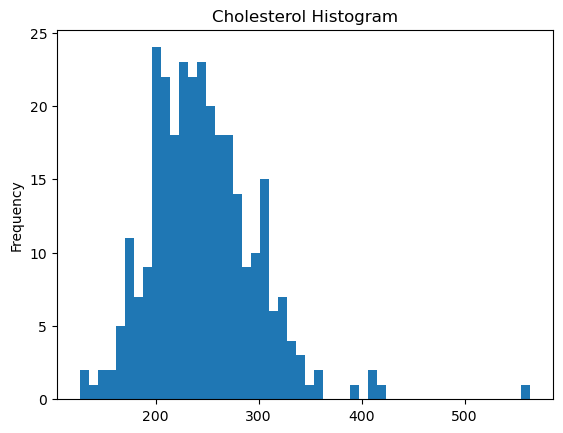

In [4]:
hd_df['chol'].plot(kind='hist',bins=50,title='Cholesterol Histogram');

In [5]:
hd_df[hd_df['chol'] > 500]

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
85   67    0   2       115   564    0        0      160      0      1.6   

    slope  ca  thal  target  
85      1   0     3       1

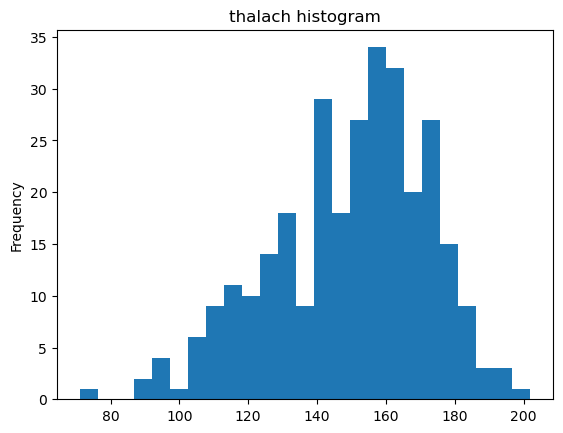

In [6]:
hd_df['thalach'].plot(kind='hist',bins=25,title='thalach histogram');

In [7]:
hd_df[hd_df['thalach'] < 90]

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
243   57    1   0       152   274    0        1       88      1      1.2   
272   67    1   0       120   237    0        1       71      0      1.0   

     slope  ca  thal  target  
243      1   1     3       0  
272      1   0     2       0

In [8]:
hd_df.drop(labels=[85, 243, 272], inplace = True)

**Let's drop our outliers**

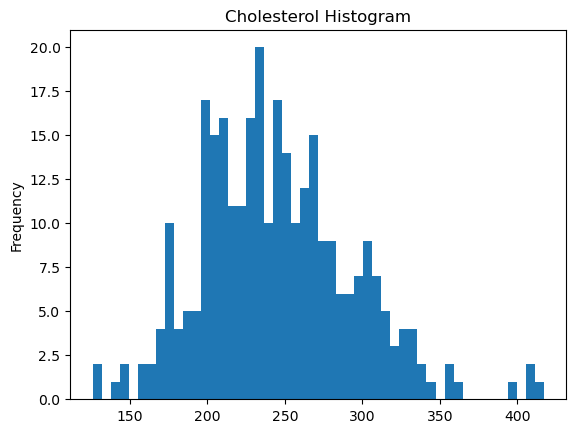

In [9]:
hd_df['chol'].plot(kind='hist',bins=50,title='Cholesterol Histogram');

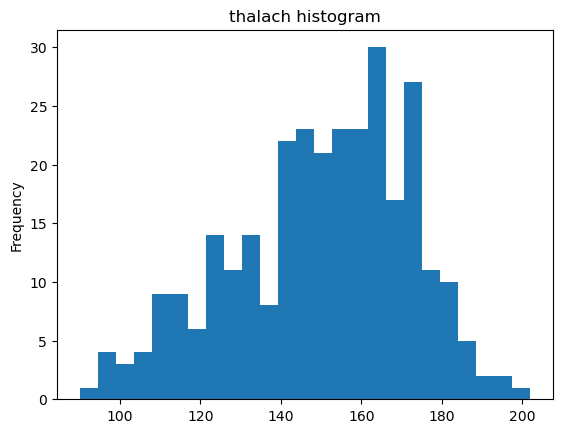

In [10]:
hd_df['thalach'].plot(kind='hist',bins=25,title='thalach histogram');

In [11]:
# Let's find out how many of each class (has heart disease, 
# doesn't have it) there are
hd_df['target'].value_counts()

1    164
0    136
Name: target, dtype: int64

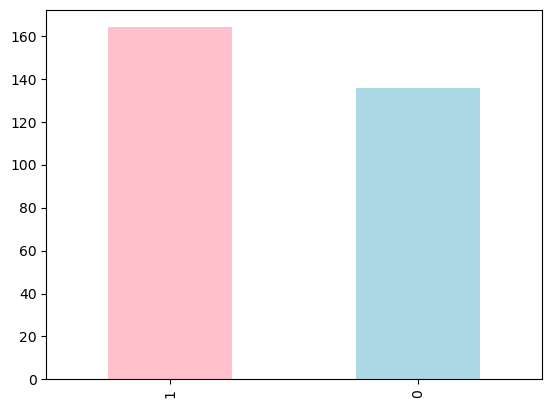

In [12]:
hd_df['target'].value_counts().plot(kind='bar',color=['pink','lightblue']);

In [13]:
hd_df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

## Heart Disease Frequency w.r.t. Sex

In [14]:
# df['sex'].value_counts()
hd_df.sex.value_counts()

1    205
0     95
Name: sex, dtype: int64

In [15]:
pd.crosstab(hd_df.target, hd_df.sex)

sex      0    1
target         
0       24  112
1       71   93

Based on this cross section, we can see that in this population women have roughly 75% chance of having heart disease and males have less than 50%.  All people have a 54% chance.

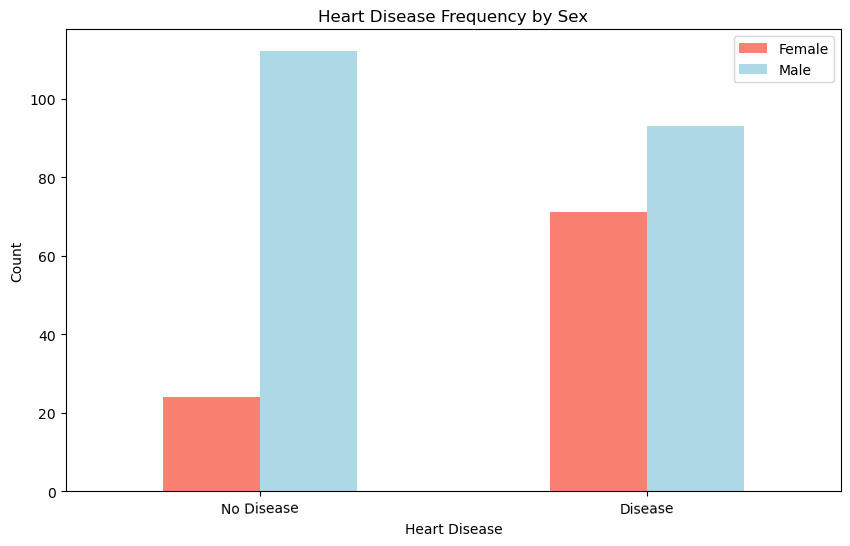

In [16]:
# Create a plot of crosstab
pd.crosstab(hd_df.target, hd_df.sex).plot(kind="bar",
                                   figsize=(10,6),
                                   color=['salmon','lightblue'])

plt.title("Heart Disease Frequency by Sex")
plt.xlabel("Heart Disease")
plt.ylabel("Count")
plt.xticks(ticks=[0,1],labels=['No Disease','Disease'],rotation=True)
plt.legend(["Female","Male"]);

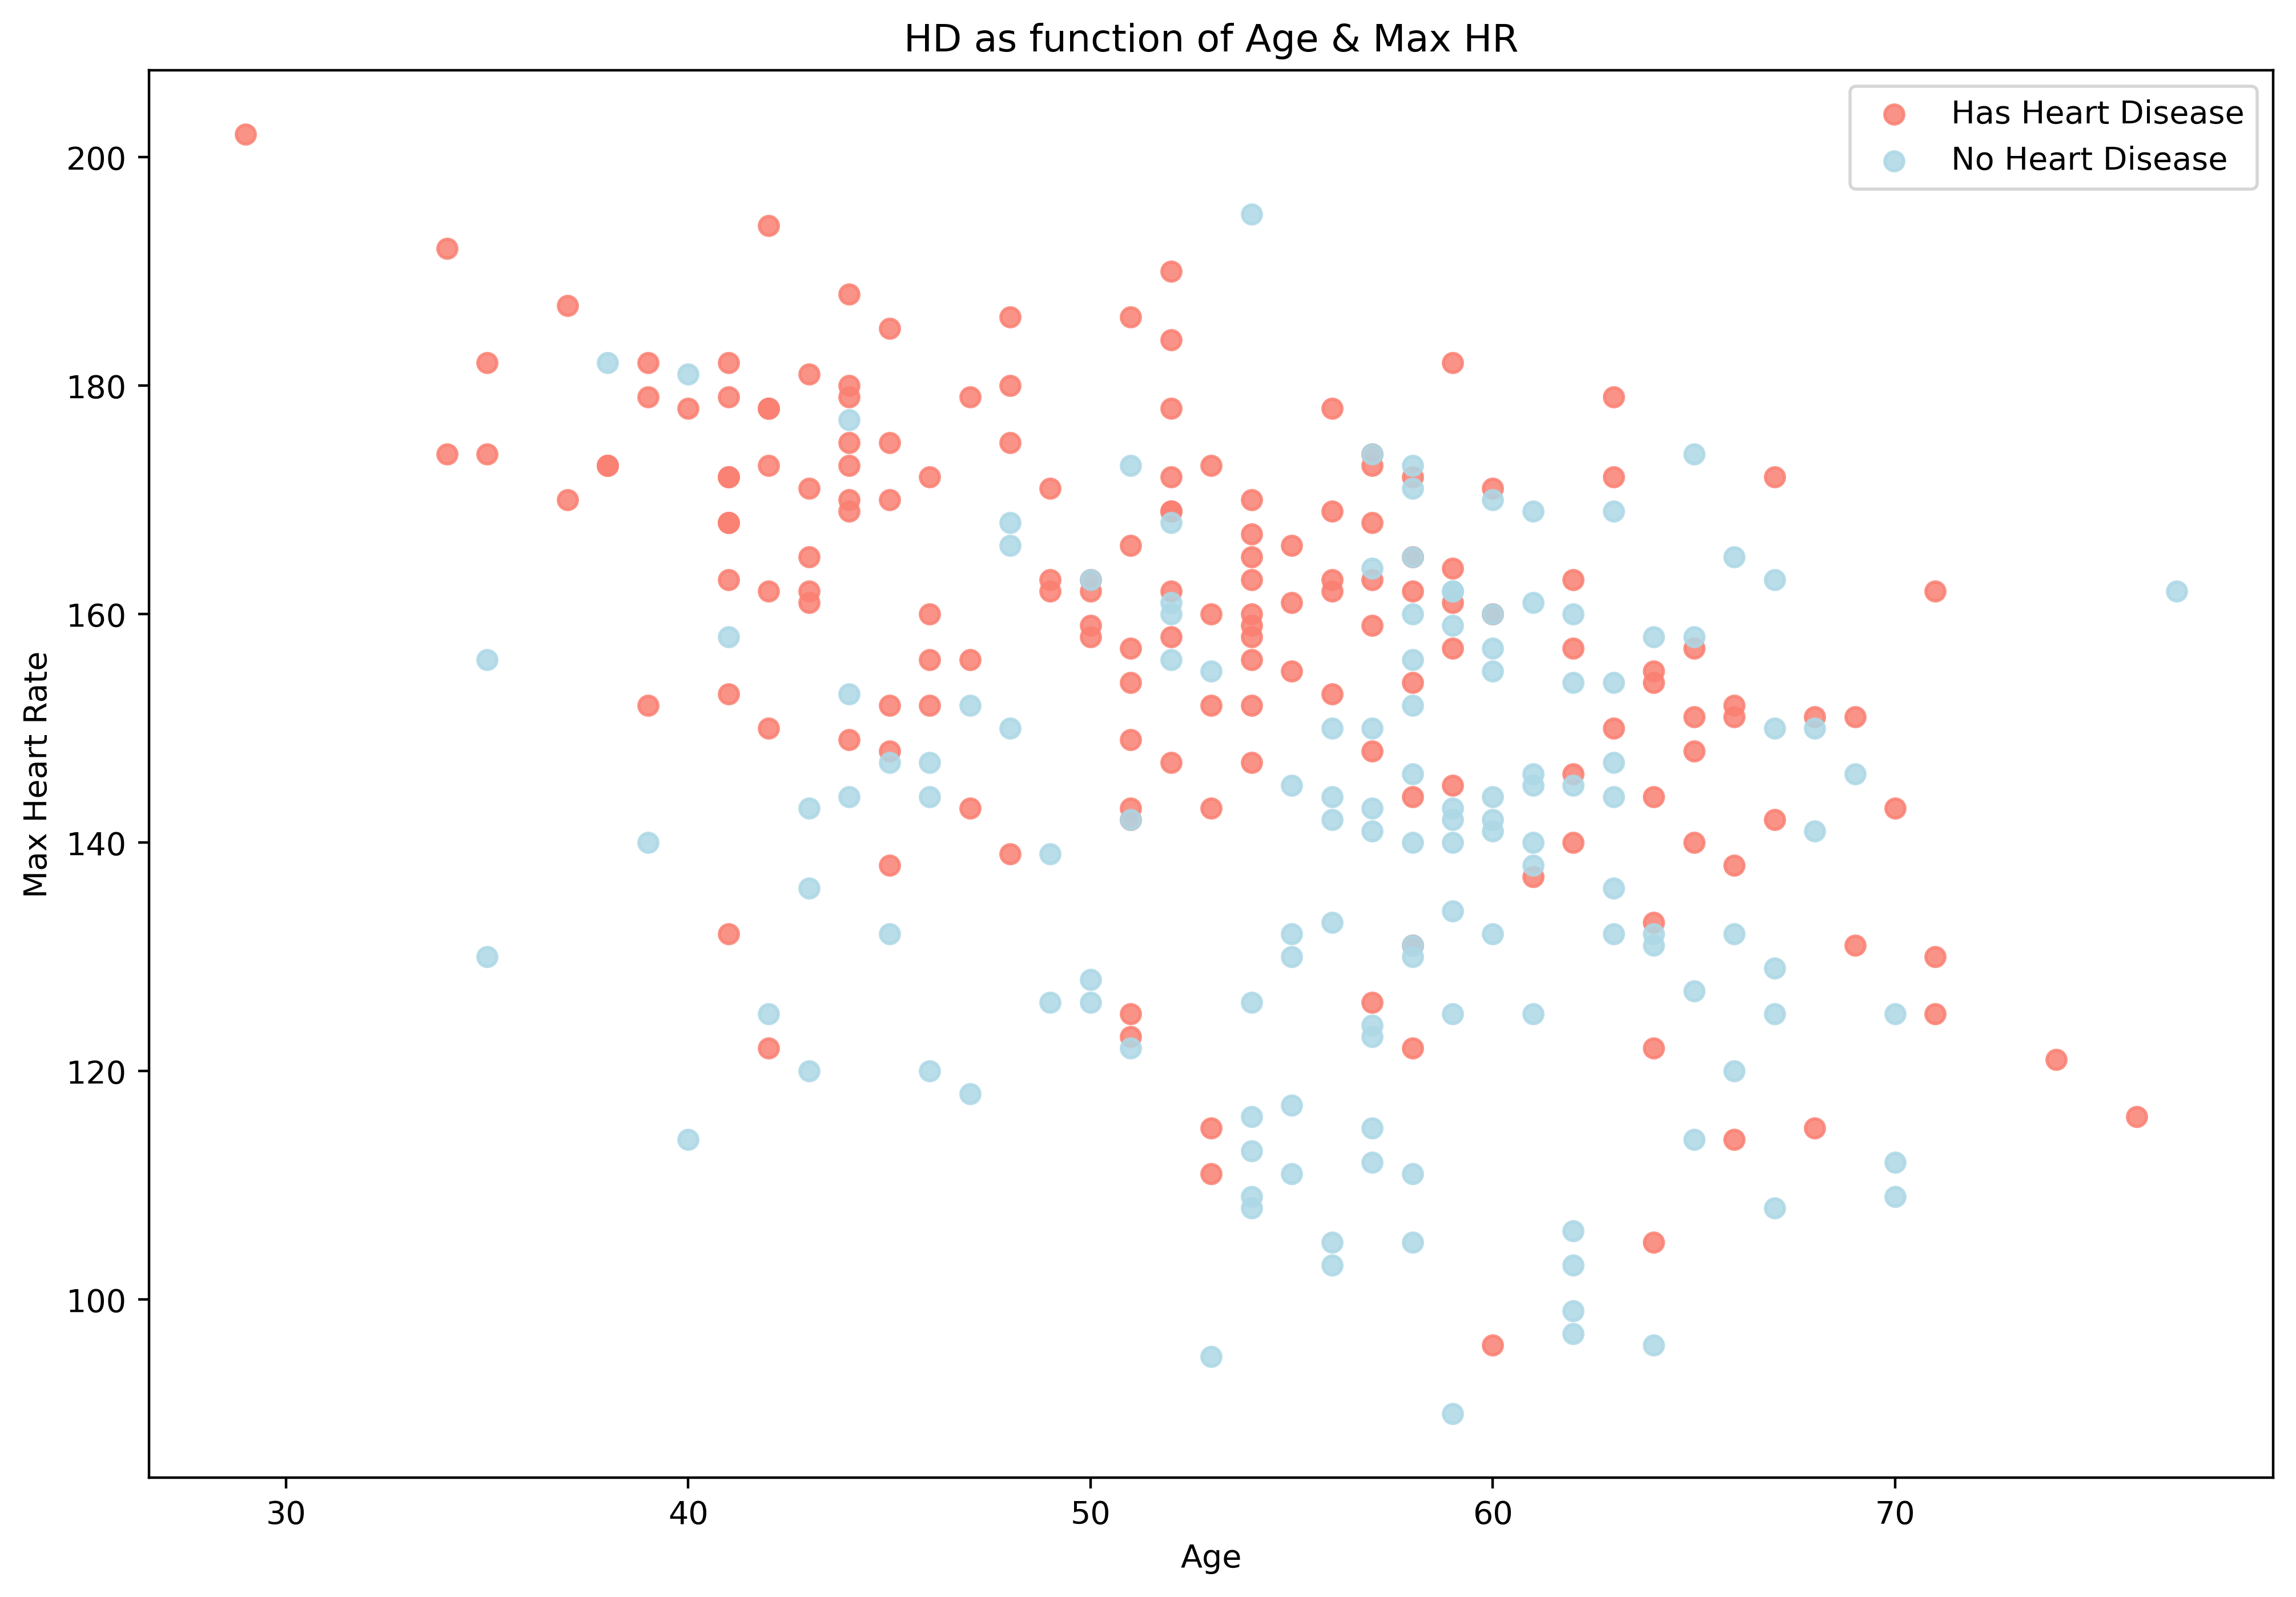

In [17]:
# Create new figure
plt.figure(figsize=(12,8), dpi=400)

# Scatter with positive examples
plt.scatter(hd_df.age[hd_df.target==1],
            hd_df.thalach[hd_df.target==1],
           color="salmon",
           alpha=0.85);

# Scatter with negative examples
plt.scatter(hd_df.age[hd_df.target==0],
           hd_df.thalach[hd_df.target==0],
           color="lightblue",
           alpha=0.85);

# Add some info
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.title("HD as function of Age & Max HR")
plt.legend(labels=["Has Heart Disease", "No Heart Disease"]);

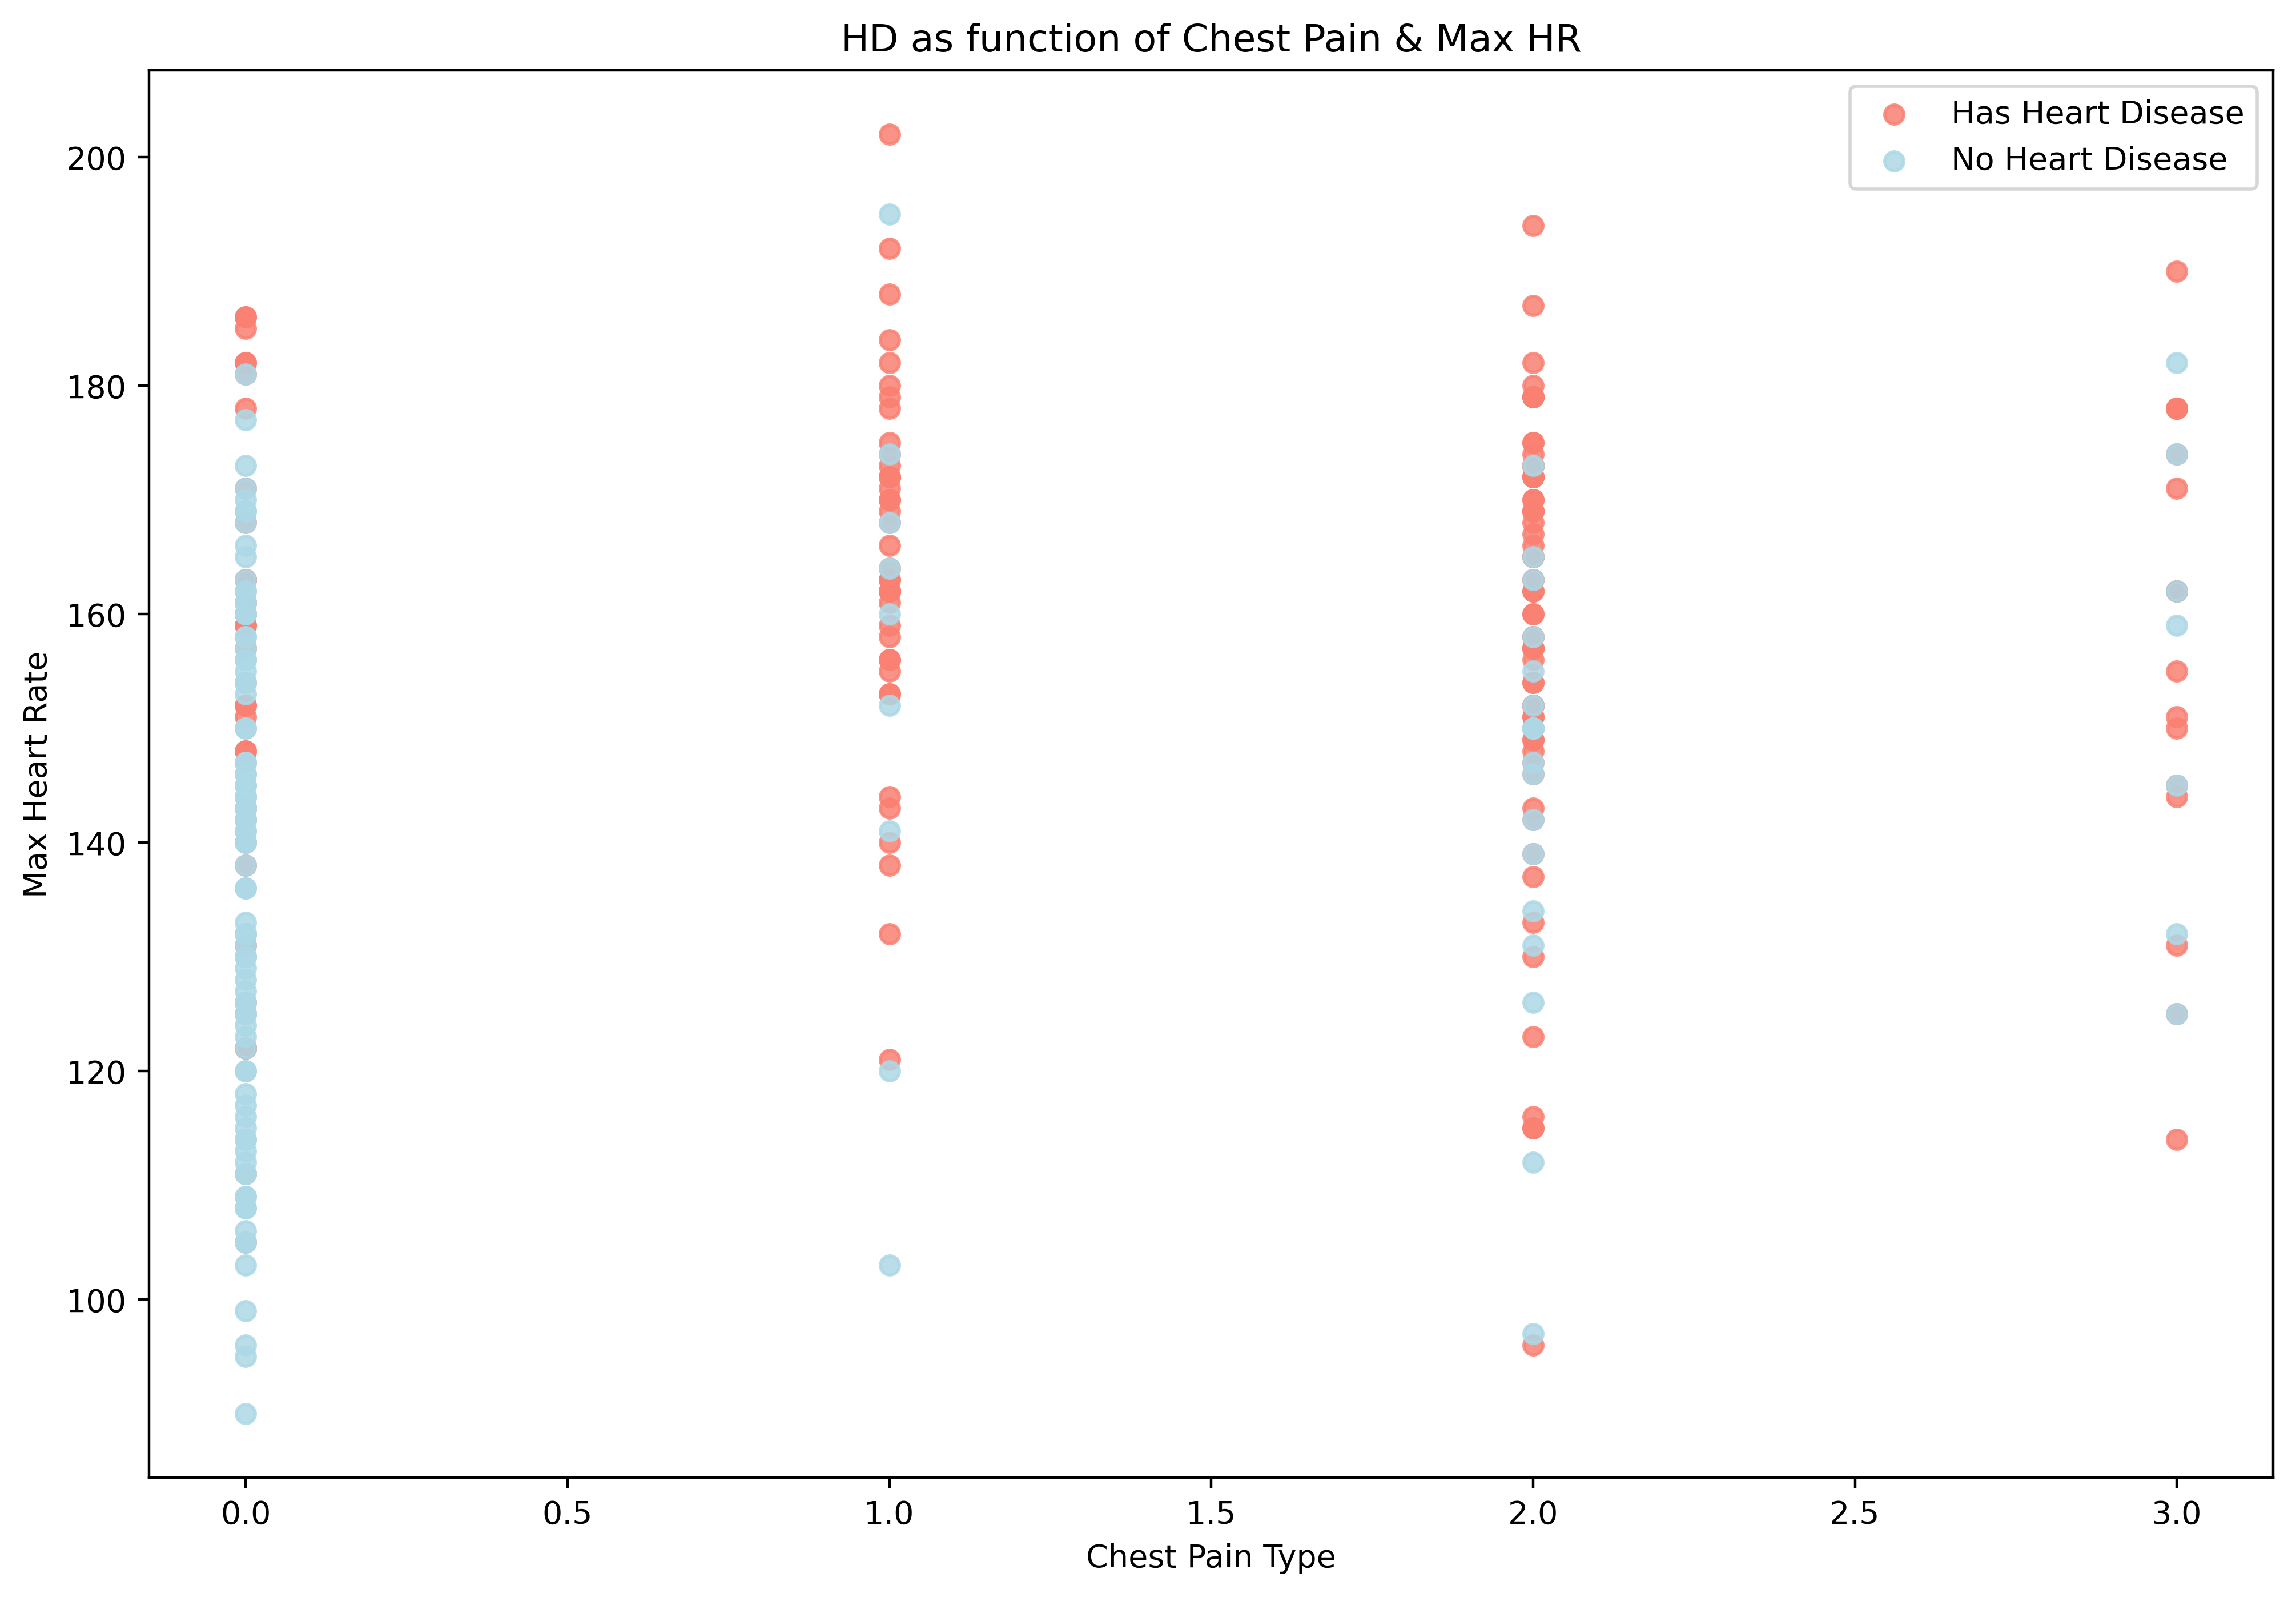

In [18]:
# Create new figure
plt.figure(figsize=(12,8), dpi=400)

# Scatter with positive examples
plt.scatter(hd_df.cp[hd_df.target==1],
            hd_df.thalach[hd_df.target==1],
           color="salmon",
           alpha=0.85);

# Scatter with negative examples
plt.scatter(hd_df.cp[hd_df.target==0],
           hd_df.thalach[hd_df.target==0],
           color="lightblue",
           alpha=0.85);

# Add some info
plt.xlabel("Chest Pain Type")
plt.ylabel("Max Heart Rate")
plt.title("HD as function of Chest Pain & Max HR")
plt.legend(labels=["Has Heart Disease", "No Heart Disease"]);

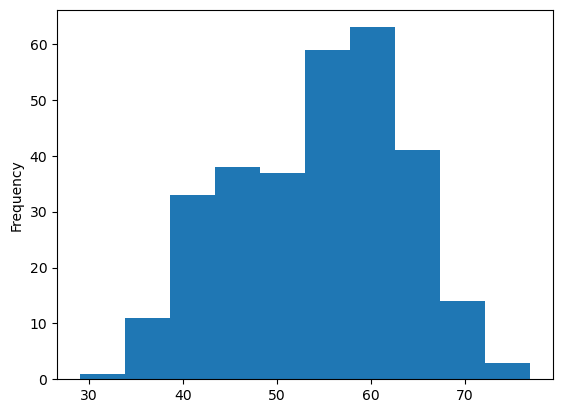

In [19]:
hd_df.age.plot.hist(bins=10);

This is a relatively normal distribution with a left skew

## Heart Disease Frequency per Chest Pain Type
* cp chest pain type ([typical angina, atypical angina, non-anginal, asymptomatic])

In [20]:
pd.crosstab(hd_df.cp,hd_df.target)

target    0   1
cp             
0       102  39
1         9  41
2        18  68
3         7  16

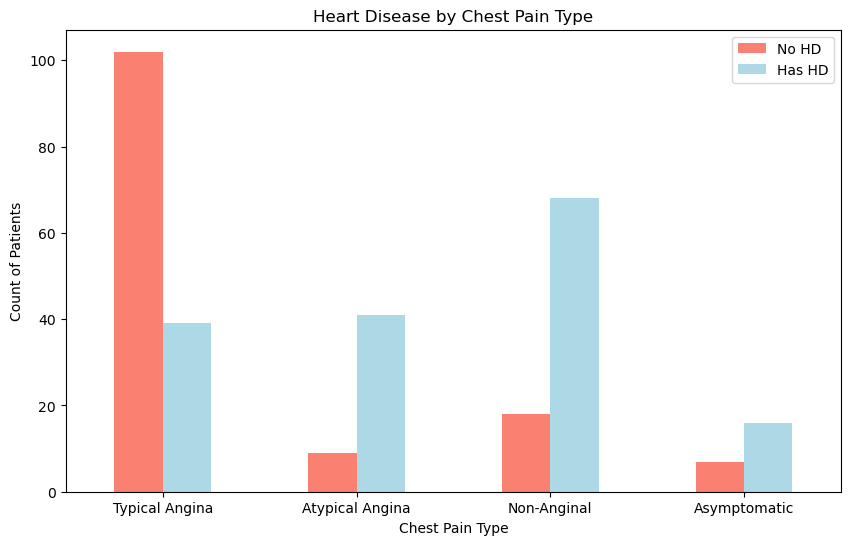

In [21]:
# Make the crosstab more visual

pd.crosstab(hd_df.cp, hd_df.target).plot(kind="bar",
                                  figsize=(10,6),
                                  color=["salmon","lightblue"])

# Add some info to the chart
plt.title("Heart Disease by Chest Pain Type")
plt.xlabel("Chest Pain Type")
plt.ylabel("Count of Patients")
plt.xticks(ticks=[0,1,2,3],
           labels=["Typical Angina","Atypical Angina","Non-Anginal","Asymptomatic"],
          rotation=0)
plt.legend(labels=["No HD","Has HD"]);

**We are going to build a correlation matrix**

In [22]:
hd_df.corr()

age       sex        cp  trestbps      chol       fbs  \
age       1.000000 -0.096604 -0.068787  0.288862  0.199772  0.126539   
sex      -0.096604  1.000000 -0.040669 -0.063096 -0.181639  0.045153   
cp       -0.068787 -0.040669  1.000000  0.052769 -0.103215  0.093737   
trestbps  0.288862 -0.063096  0.052769  1.000000  0.150415  0.177853   
chol      0.199772 -0.181639 -0.103215  0.150415  1.000000  0.023915   
fbs       0.126539  0.045153  0.093737  0.177853  0.023915  1.000000   
restecg  -0.117898 -0.067750  0.053805 -0.119787 -0.141563 -0.083522   
thalach  -0.397499 -0.029136  0.285777 -0.044115 -0.017659 -0.017047   
exang     0.103026  0.138020 -0.393452  0.058951  0.084052  0.025876   
oldpeak   0.209267  0.098747 -0.151258  0.195080  0.046920  0.006574   
slope    -0.163582 -0.031165  0.118617 -0.123256  0.010741 -0.062792   
ca        0.285082  0.116613 -0.181249  0.097170  0.090206  0.136726   
thal      0.064787  0.216212 -0.165061  0.060852  0.079124 -0.029770   
target   -0.226225 -0.274452  0.428228 -0.141654 -0.110112 -0.030004   

           restecg   thalach     exang   oldpeak     slope        ca  \
age      -0.117898 -0.397499  0.103026  0.209267 -0.163582  0.285082   
sex      -0.067750 -0.029136  0.138020  0.098747 -0.031165  0.116613   
cp        0.053805  0.285777 -0.393452 -0.151258  0.118617 -0.181249   
trestbps -0.119787 -0.044115  0.058951  0.195080 -0.123256  0.097170   
chol     -0.141563 -0.017659  0.084052  0.046920  0.010741  0.090206   
fbs      -0.083522 -0.017047  0.025876  0.006574 -0.062792  0.136726   
restecg   1.000000  0.066316 -0.075947 -0.057755  0.095374 -0.073523   
thalach   0.066316  1.000000 -0.387396 -0.355757  0.387910 -0.225676   
exang    -0.075947 -0.387396  1.000000  0.290177 -0.259503  0.111962   
oldpeak  -0.057755 -0.355757  0.290177  1.000000 -0.577727  0.224128   
slope     0.095374  0.387910 -0.259503 -0.577727  1.000000 -0.082998   
ca       -0.073523 -0.225676  0.111962  0.224128 -0.082998  1.000000   
thal     -0.010170 -0.097448  0.204804  0.208924 -0.101697  0.153295   
target    0.148199  0.413767 -0.436500 -0.434276  0.345698 -0.394023   

              thal    target  
age       0.064787 -0.226225  
sex       0.216212 -0.274452  
cp       -0.165061  0.428228  
trestbps  0.060852 -0.141654  
chol      0.079124 -0.110112  
fbs      -0.029770 -0.030004  
restecg  -0.010170  0.148199  
thalach  -0.097448  0.413767  
exang     0.204804 -0.436500  
oldpeak   0.208924 -0.434276  
slope    -0.101697  0.345698  
ca        0.153295 -0.394023  
thal      1.000000 -0.348661  
target   -0.348661  1.000000

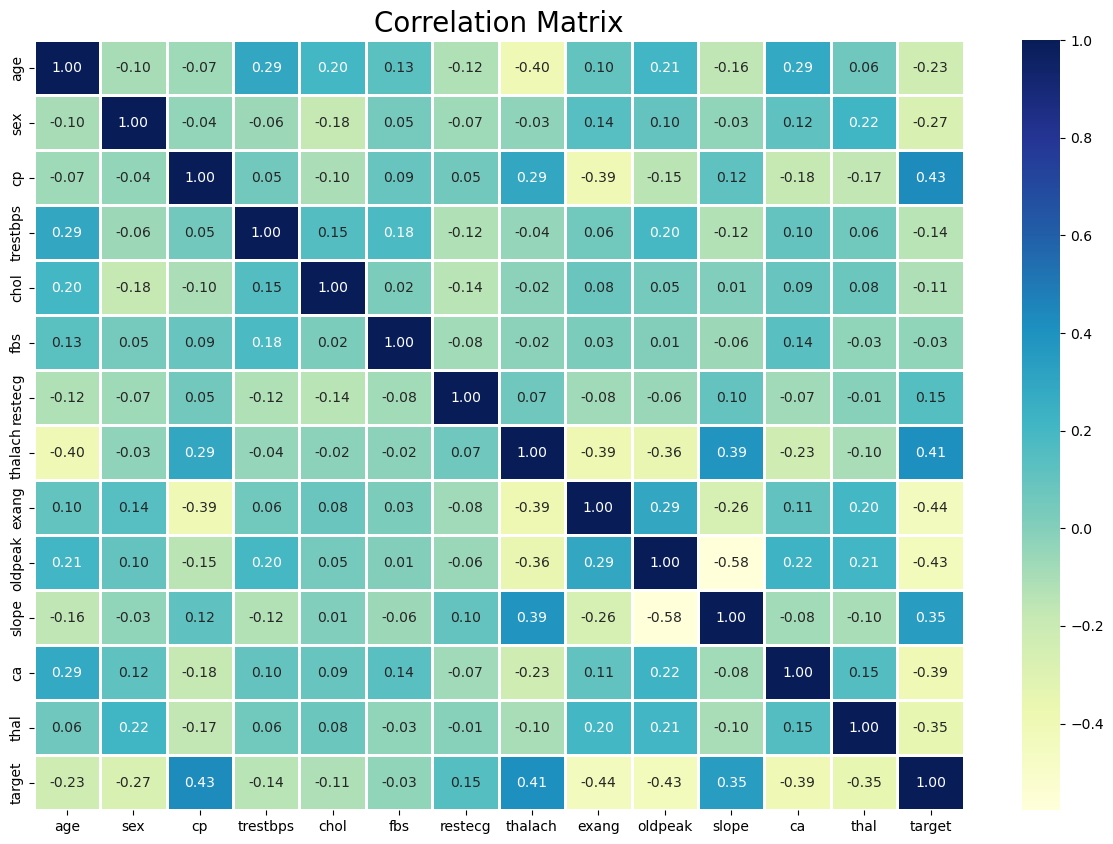

In [23]:
corr_matrix = hd_df.corr()

fig, ax = plt.subplots(figsize=(15,10))

ax = sns.heatmap(
    data = corr_matrix,
    annot = True,
    linewidth = 0.75,
    fmt = ".2f",
    cmap = "YlGnBu"
)

ax.set_title('Correlation Matrix', fontsize = 20);

### 5.3 Make our train and test split

In [24]:
# Create X
X = hd_df.drop("target", axis=1)

# Create y
y = hd_df["target"]

In [25]:
from sklearn.model_selection import train_test_split

np.random.seed(42)

# Use TTS to split the data for fitting the models
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [26]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((240, 13), (60, 13), (240,), (60,))

### 5.4 Let's test out some classification models

In [27]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

rfc = RandomForestClassifier(random_state = 42)

rfc.fit(X_train, y_train);

y_preds = rfc.predict(X_test)

rfc.score(X_test, y_test)

0.9

In [28]:
rfc.score(X_train, y_train)

1.0

In [29]:
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

In [30]:
np.random.seed(42)

models = {"LinearSVC":LinearSVC(max_iter=200000),
          "SVC":SVC(),
          "KNN":KNeighborsClassifier(),
          "LogisticRegression":LogisticRegression(max_iter=1000),
          "RFC":RandomForestClassifier(random_state = 42)
}

results = {}

In [31]:
np.random.seed(42)

for model_name, model in models.items():
    model.fit(X_train, y_train)
    results[model_name] = model.score(X_test, y_test)

results

C:\Users\JohnC\Desktop\heart_disease_classification\env\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


{'LinearSVC': 0.85,
 'SVC': 0.5833333333333334,
 'KNN': 0.5833333333333334,
 'LogisticRegression': 0.8333333333333334,
 'RFC': 0.9}

<Axes: >

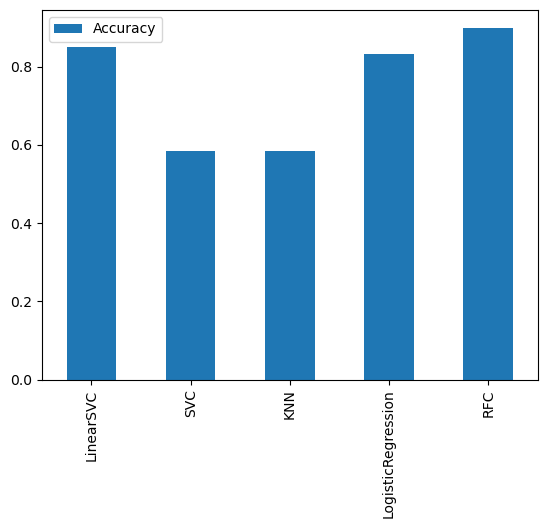

In [32]:
results_df = pd.DataFrame(results.values(),
                         results.keys(),
                         columns=["Accuracy"])

results_df.plot.bar()

### 5.5 Hyperparameter Tuning of Preferred Model

**The RandomForestClassifier works the best, but I'd like to explore one more model as well.  Even with a huge number of iterations for the LinearSVC model, we still can't get convergence.  It takes much more computational power, so since it's performing equally to Logistic Regression we'll go with that.  Now, we'll tune the hyperparameters to see if we can improve the models.**

#### LogisticRegression - Hyperparameter Tuning

In [33]:
np.linspace(0,2,50)

array([0.        , 0.04081633, 0.08163265, 0.12244898, 0.16326531,
       0.20408163, 0.24489796, 0.28571429, 0.32653061, 0.36734694,
       0.40816327, 0.44897959, 0.48979592, 0.53061224, 0.57142857,
       0.6122449 , 0.65306122, 0.69387755, 0.73469388, 0.7755102 ,
       0.81632653, 0.85714286, 0.89795918, 0.93877551, 0.97959184,
       1.02040816, 1.06122449, 1.10204082, 1.14285714, 1.18367347,
       1.2244898 , 1.26530612, 1.30612245, 1.34693878, 1.3877551 ,
       1.42857143, 1.46938776, 1.51020408, 1.55102041, 1.59183673,
       1.63265306, 1.67346939, 1.71428571, 1.75510204, 1.79591837,
       1.83673469, 1.87755102, 1.91836735, 1.95918367, 2.        ])

In [34]:
log_reg_grid = {"C":np.linspace(0,2,50),
                "solver":["liblinear"]                
}

In [35]:
np.random.seed(42)

from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

rs_log_reg = RandomizedSearchCV(
        estimator = LogisticRegression(),
        param_distributions = log_reg_grid,
        cv = 5,
        n_iter = 50,
        verbose=2
)

rs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] END ............................C=0.0, solver=liblinear; total time=   0.0s
[CV] END ............................C=0.0, solver=liblinear; total time=   0.0s
[CV] END ............................C=0.0, solver=liblinear; total time=   0.0s
[CV] END ............................C=0.0, solver=liblinear; total time=   0.0s
[CV] END ............................C=0.0, solver=liblinear; total time=   0.0s
[CV] END ............C=0.04081632653061224, solver=liblinear; total time=   0.0s
[CV] END ............C=0.04081632653061224, solver=liblinear; total time=   0.0s
[CV] END ............C=0.04081632653061224, solver=liblinear; total time=   0.0s
[CV] END ............C=0.04081632653061224, solver=liblinear; total time=   0.0s
[CV] END ............C=0.04081632653061224, solver=liblinear; total time=   0.0s
[CV] END ............C=0.08163265306122448, solver=liblinear; total time=   0.0s
[CV] END ............C=0.08163265306122448, sol

[CV] END .............C=1.1020408163265305, solver=liblinear; total time=   0.0s
[CV] END .............C=1.1020408163265305, solver=liblinear; total time=   0.0s
[CV] END .............C=1.1020408163265305, solver=liblinear; total time=   0.0s
[CV] END .............C=1.1020408163265305, solver=liblinear; total time=   0.0s
[CV] END .............C=1.1428571428571428, solver=liblinear; total time=   0.0s
[CV] END .............C=1.1428571428571428, solver=liblinear; total time=   0.0s
[CV] END .............C=1.1428571428571428, solver=liblinear; total time=   0.0s
[CV] END .............C=1.1428571428571428, solver=liblinear; total time=   0.0s
[CV] END .............C=1.1428571428571428, solver=liblinear; total time=   0.0s
[CV] END ..............C=1.183673469387755, solver=liblinear; total time=   0.0s
[CV] END ..............C=1.183673469387755, solver=liblinear; total time=   0.0s
[CV] END ..............C=1.183673469387755, solver=liblinear; total time=   0.0s
[CV] END ..............C=1.1

C:\Users\JohnC\Desktop\heart_disease_classification\env\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
5 fits failed out of a total of 250.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\JohnC\Desktop\heart_disease_classification\env\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\JohnC\Desktop\heart_disease_classification\env\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1160, in fit
    self._validate_params()
  File "C:\Users\JohnC\Desktop\heart_disease_classification\env\Lib\site-packages\skl

RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=50,
                   param_distributions={'C': array([0.        , 0.04081633, 0.08163265, 0.12244898, 0.16326531,
       0.20408163, 0.24489796, 0.28571429, 0.32653061, 0.36734694,
       0.40816327, 0.44897959, 0.48979592, 0.53061224, 0.57142857,
       0.6122449 , 0.65306122, 0.69387755, 0.73469388, 0.7755102 ,
       0.81632653, 0.85714286, 0.89795918, 0.93877551, 0.97959184,
       1.02040816, 1.06122449, 1.10204082, 1.14285714, 1.18367347,
       1.2244898 , 1.26530612, 1.30612245, 1.34693878, 1.3877551 ,
       1.42857143, 1.46938776, 1.51020408, 1.55102041, 1.59183673,
       1.63265306, 1.67346939, 1.71428571, 1.75510204, 1.79591837,
       1.83673469, 1.87755102, 1.91836735, 1.95918367, 2.        ]),
                                        'solver': ['liblinear']},
                   verbose=2)

In [36]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.24489795918367346}

In [37]:
rs_log_reg.score(X_test, y_test)

0.9

In [38]:
np.linspace(0.15,.3,100)

array([0.15      , 0.15151515, 0.1530303 , 0.15454545, 0.15606061,
       0.15757576, 0.15909091, 0.16060606, 0.16212121, 0.16363636,
       0.16515152, 0.16666667, 0.16818182, 0.16969697, 0.17121212,
       0.17272727, 0.17424242, 0.17575758, 0.17727273, 0.17878788,
       0.18030303, 0.18181818, 0.18333333, 0.18484848, 0.18636364,
       0.18787879, 0.18939394, 0.19090909, 0.19242424, 0.19393939,
       0.19545455, 0.1969697 , 0.19848485, 0.2       , 0.20151515,
       0.2030303 , 0.20454545, 0.20606061, 0.20757576, 0.20909091,
       0.21060606, 0.21212121, 0.21363636, 0.21515152, 0.21666667,
       0.21818182, 0.21969697, 0.22121212, 0.22272727, 0.22424242,
       0.22575758, 0.22727273, 0.22878788, 0.23030303, 0.23181818,
       0.23333333, 0.23484848, 0.23636364, 0.23787879, 0.23939394,
       0.24090909, 0.24242424, 0.24393939, 0.24545455, 0.2469697 ,
       0.24848485, 0.25      , 0.25151515, 0.2530303 , 0.25454545,
       0.25606061, 0.25757576, 0.25909091, 0.26060606, 0.26212

In [39]:
log_reg_grid2 = {
    "C":np.linspace(0.15,.3,100),
    "solver":["liblinear"]
}

In [40]:
np.random.seed(42)

gs_log_reg = GridSearchCV(
    estimator = LogisticRegression(),
    param_grid = log_reg_grid2,
    cv = 5,
    n_jobs = 50,
    verbose = 2
)

gs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=50,
             param_grid={'C': array([0.15      , 0.15151515, 0.1530303 , 0.15454545, 0.15606061,
       0.15757576, 0.15909091, 0.16060606, 0.16212121, 0.16363636,
       0.16515152, 0.16666667, 0.16818182, 0.16969697, 0.17121212,
       0.17272727, 0.17424242, 0.17575758, 0.17727273, 0.17878788,
       0.18030303, 0.18181818, 0.18333333, 0.18484848, 0.18636364,...
       0.25606061, 0.25757576, 0.25909091, 0.26060606, 0.26212121,
       0.26363636, 0.26515152, 0.26666667, 0.26818182, 0.26969697,
       0.27121212, 0.27272727, 0.27424242, 0.27575758, 0.27727273,
       0.27878788, 0.28030303, 0.28181818, 0.28333333, 0.28484848,
       0.28636364, 0.28787879, 0.28939394, 0.29090909, 0.29242424,
       0.29393939, 0.29545455, 0.2969697 , 0.29848485, 0.3       ]),
                         'solver': ['liblinear']},
             verbose=2)

In [41]:
gs_log_reg.best_params_

{'C': 0.24393939393939393, 'solver': 'liblinear'}

In [42]:
gs_log_reg.score(X_test, y_test)

0.9

In [43]:
np.random.seed(42)

logreg_clf = LogisticRegression(C = 0.24393939393939393, solver = "liblinear")

logreg_clf.fit(X_train, y_train)

logreg_clf.score(X_test, y_test)

0.9

#### RandomForestClassifier - Hyperparemeter Tuning

In [44]:
np.random.seed(42)

rf_clf = RandomForestClassifier()

rf_clf.fit(X_train, y_train)

rf_clf.score(X_test, y_test)

0.9

In [45]:
rfc_grid = {
    "n_estimators":[50, 100, 200, 300, 400, 500],
    "max_depth": [None, 5, 10, 15, 20],
    "min_samples_split": [2, 5, 10, 15],
    "min_samples_leaf": [1, 2, 4, 6],
    "max_features": ["sqrt", "log2", None],
    "bootstrap": [True, False]
}

In [46]:
np.random.seed(42)

rs_rfc = RandomizedSearchCV(
    estimator = RandomForestClassifier(),
    param_distributions = rfc_grid,
    cv = 5,
    n_iter = 50,
    verbose = 2
)

rs_rfc.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] END bootstrap=True, max_depth=5, max_features=log2, min_samples_leaf=6, min_samples_split=10, n_estimators=300; total time=   0.3s
[CV] END bootstrap=True, max_depth=5, max_features=log2, min_samples_leaf=6, min_samples_split=10, n_estimators=300; total time=   0.4s
[CV] END bootstrap=True, max_depth=5, max_features=log2, min_samples_leaf=6, min_samples_split=10, n_estimators=300; total time=   0.3s
[CV] END bootstrap=True, max_depth=5, max_features=log2, min_samples_leaf=6, min_samples_split=10, n_estimators=300; total time=   0.3s
[CV] END bootstrap=True, max_depth=5, max_features=log2, min_samples_leaf=6, min_samples_split=10, n_estimators=300; total time=   0.4s
[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=10

[CV] END bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=6, min_samples_split=5, n_estimators=200; total time=   0.2s
[CV] END bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=6, min_samples_split=5, n_estimators=200; total time=   0.2s
[CV] END bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=6, min_samples_split=5, n_estimators=200; total time=   0.2s
[CV] END bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=6, min_samples_split=5, n_estimators=200; total time=   0.2s
[CV] END bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=6, min_samples_split=5, n_estimators=200; total time=   0.2s
[CV] END bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, max_depth=5, max_features=s

[CV] END bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=6, min_samples_split=2, n_estimators=500; total time=   0.5s
[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=6, min_samples_split=2, n_estimators=500; total time=   0.5s
[CV] END bootstrap=False, max_depth=None, 

[CV] END bootstrap=False, max_depth=10, max_features=None, min_samples_leaf=6, min_samples_split=15, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, max_depth=10, max_features=None, min_samples_leaf=6, min_samples_split=15, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, max_depth=10, max_features=None, min_samples_leaf=6, min_samples_split=15, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, max_depth=10, max_features=None, min_samples_leaf=6, min_samples_split=15, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=400; total time=   0.5s
[CV] END bootstrap=True, max_depth=None, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=400; total time=   0.5s
[CV] END bootstrap=True, max_depth=None, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=400; total time=   0.5s
[CV] END bootstrap=True, max_depth

[CV] END bootstrap=False, max_depth=20, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.2s
[CV] END bootstrap=False, max_depth=20, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.2s
[CV] END bootstrap=False, max_depth=20, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.2s
[CV] END bootstrap=False, max_depth=20, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.2s
[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, max_depth=20, ma

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=50,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [None, 5, 10, 15, 20],
                                        'max_features': ['sqrt', 'log2', None],
                                        'min_samples_leaf': [1, 2, 4, 6],
                                        'min_samples_split': [2, 5, 10, 15],
                                        'n_estimators': [50, 100, 200, 300, 400,
                                                         500]},
                   verbose=2)

In [47]:
rs_rfc.best_params_

{'n_estimators': 100,
 'min_samples_split': 10,
 'min_samples_leaf': 6,
 'max_features': None,
 'max_depth': 20,
 'bootstrap': True}

In [48]:
rs_rfc.score(X_test, y_test)

0.9

**The baseline RandomForestClassifier model performs as well**

**The LogReg and the RFC models both scored a 90% on accuracy**

In [49]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, f1_score, recall_score

In [50]:
y_preds_rfc = rf_clf.predict(X_test)

y_preds_logreg = logreg_clf.predict(X_test)

In [51]:
rfc_clf_cm = confusion_matrix(y_test, y_preds_rfc)

logreg_clf_cm = confusion_matrix(y_test, y_preds_logreg)

In [52]:
import seaborn as sns

In [53]:
def conf_mat_viz(clf_cm):

        fig = plt.figure(figsize = (6,6), dpi=125)

        sns.heatmap(clf_cm, annot=True, cmap="Blues",
                    xticklabels=['No HD','Has HD'],
                    yticklabels=['No HD','Has HD'])
        plt.ylabel("True Label")
        plt.xlabel("Predicted Label")
        plt.title("Heart Disease Classifier Confusion Matrix")
        plt.show()

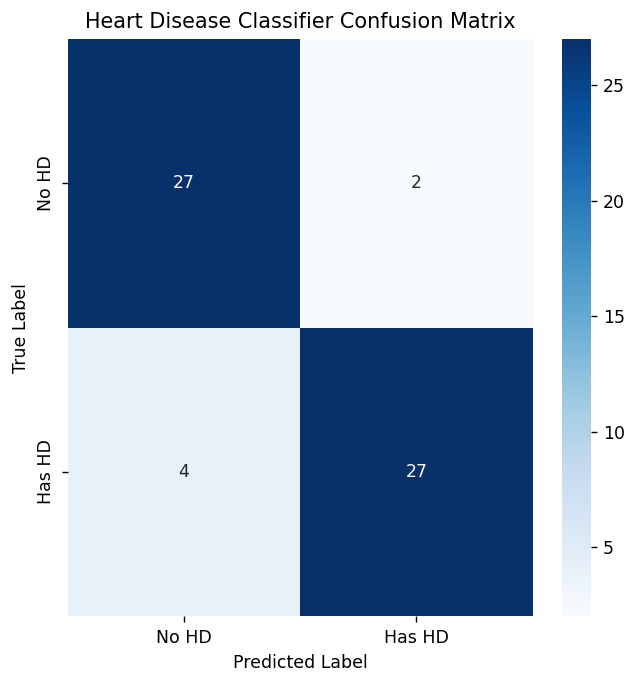

In [54]:
conf_mat_viz(rfc_clf_cm)

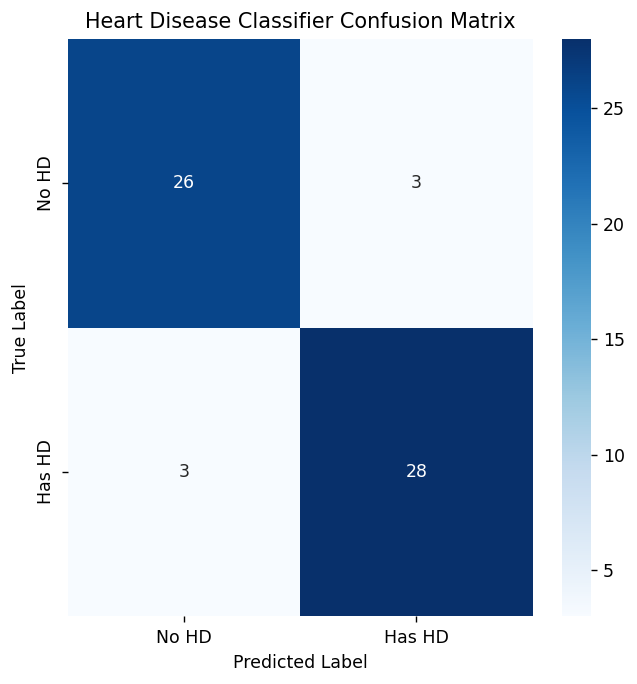

In [55]:
conf_mat_viz(logreg_clf_cm)

In [56]:
print(classification_report(y_test, y_preds_rfc))

              precision    recall  f1-score   support

           0       0.87      0.93      0.90        29
           1       0.93      0.87      0.90        31

    accuracy                           0.90        60
   macro avg       0.90      0.90      0.90        60
weighted avg       0.90      0.90      0.90        60



In [57]:
print(classification_report(y_test, y_preds_logreg))

              precision    recall  f1-score   support

           0       0.90      0.90      0.90        29
           1       0.90      0.90      0.90        31

    accuracy                           0.90        60
   macro avg       0.90      0.90      0.90        60
weighted avg       0.90      0.90      0.90        60



**While their accuracy and f1 scores are the same, there are differences in their precision and recall scores.**

**This indicates that the RFC produces fewer false positives, but more false negatives.**

**Let's do a cross-validated set of metrics.**

<Figure size 1200x1200 with 0 Axes>

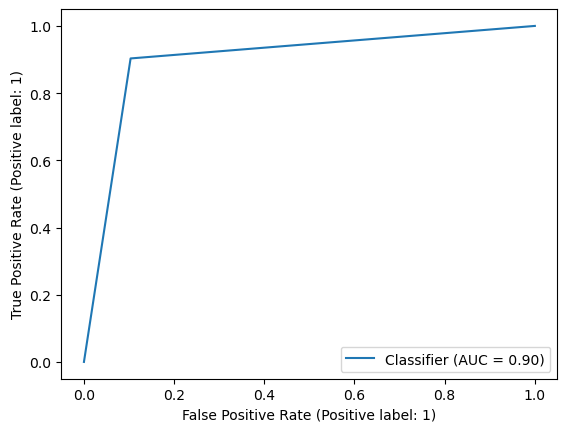

In [58]:
from sklearn.metrics import RocCurveDisplay

plt.figure(figsize=(8,8), dpi=150)
RocCurveDisplay.from_predictions(y_test, y_preds_logreg)
plt.show()

<Figure size 1200x1200 with 0 Axes>

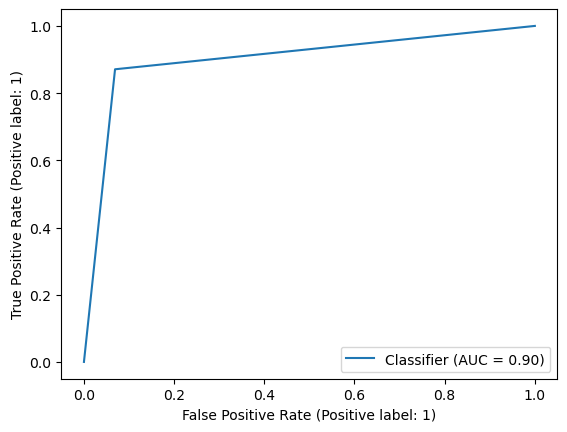

In [59]:
from sklearn.metrics import RocCurveDisplay

plt.figure(figsize=(8,8), dpi=150)
RocCurveDisplay.from_predictions(y_test, y_preds_rfc)
plt.show()

In [60]:
from sklearn.model_selection import cross_val_score

In [61]:
def cross_val_metrics(clf, X, y):
    metrics = ["accuracy", "precision", "recall", "f1"]
    
    results = {}
    
    for metric in metrics:
        results[metric] = np.round(np.mean(cross_val_score(clf,
                               X,
                               y,
                               scoring=metric,
                               cv=5)),4)
        
    return results

In [62]:
np.random.seed(42)

cross_val_metrics(rf_clf, X, y)

{'accuracy': 0.8167, 'precision': 0.8418, 'recall': 0.872, 'f1': 0.8336}

In [63]:
np.random.seed(42)

cross_val_metrics(logreg_clf, X, y)

{'accuracy': 0.84, 'precision': 0.8191, 'recall': 0.9144, 'f1': 0.863}

**It looks as though our metric scores dropped a bit, but overall it's still decent results with such a small dataset.**

**We didn't quite hit the Evaluation Target that we set at the start of this project, but it seems worth exploring with a larger dataset as we're pretty close.**

**I believe that when predicting health outcomes it is always more prudent to select a model that produces fewer false negatives, as the risk of a false negative is much greater than the risk of a false positive, generally; therefore, I would go ahead with the Logistic Regression as the classifier model.**

### 5.6 Save Model

In [65]:
from joblib import dump
dump(logreg_clf, "log_reg_clf.joblib")

['log_reg_clf.joblib']